# **Carga de cartografías en Python**
En este cuaderno vamos a ver como cargar cartografías y hacer representaciones simples de las variables sobre mapas. Antes de comenzar es conveninte, aunque no estrictamente necesario, crear un nuevo entorno para instalar las librerías espaciales con sus dependencias

In [18]:
# Podemos Crear un nuevo entorno de trabajo (mejor desde el terminal)
#! conda create -n geo_env
#! conda activate geo_env
#! conda config --env --add channels conda-forge
#! conda config --env --set channel_priority strict

# conda install --channel conda-forge geopandas

**Bibliografía recomendada**: La referencia básica para trabajar con datos espaciales con python es [Geographic Data Science with Python](https://geographicdata.science/book/intro.html)

Las principales librerías para trabajar con cartografías y datos espaciales son:
- `geopandas` para trabajar con datos espaciales. Trabaja con GeoDataFrame o geotablas, que es un dataframe donde cada fila corresponde a una figura geométrica, cada columna es un metadato y con una columna final con la geometría, puntos (x,y) que hay que unir para definir cada figura espacial (sigue la estructura de "simple features" utilizada también en `PostGis` de `Postgres` o `sf` de R)   
- `xarray` para datos espaciales raster, que representan superficies mediante cuadrículas. Trabaja con objetos DataArrays donde cada elemento tiene una coordenada (x,y) que correpnde a una celda. Yo en esta clase no trabajaré con estos datos raster. Para más información de como trabajar con datos raster, y lo más importante, de como poder convertirlos en datos tabulares tipo GeoDataFrame para poder aplicar todas las librerías de sci-kit.learn (por ejemplo) para hacer machine learning véase [Geographic Data Science with Python](https://geographicdata.science/book/intro.html)

<br>

- Para hacer el análisis estadístico espacial utilizaremos la librería **`PySal`** (sobre esta metalibrería está construido, por ejemplo [Qgis](https://www.qgis.org/)). Sobre esta librería hablaremos un poco más adelante, pero si alguien está interesado puede consultar [pysal.org](https://pysal.org/)
- para gestionar cartografías, fusionar unir, crear zonas, etc puede utilizarse  la librería **`Shapely`**. Yo no voy a ver nada de esta librería, pero animo a toda persona interesada a consultar el manual de referencia de esta librería [Shapely](https://shapely.readthedocs.io/en/stable/index.html)


## **Trabajando con Geopandas** 

La librería `geopandas` permite trabajar con cartografías (con mapas) utilizando la arquitectura de los data frames de `pandas`. Para una introducción a esta librería `geopandas` es muy recomendable visitar su web [GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html). 

Importamos Geopandas y otras librerías que también utilizaremos

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# voy a cargar geopandas pero forzando a que utilice shapely en lugar de pygeos
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

`GeoPandas` extiende la librería `Pandas` para que pueda trabajar con datos espaciales. La estructura de datos principal en `GeoPandas` es `geopandas.GeoDataFrame`, una subclase de `pandas.DataFrame`, que puede almacenar **columnas con la geometría** de cada objeto espacial (almacenado como una fila del dataframe) y realizar operaciones espaciales.

Esa columna con las geometrías es una `geopandas.GeoSeries`, una subclase de `pandas.Series`, que almacena las geometrías, esto es los puntos en el espacio que conforman de cada objeto espacial (ya sea un punto, una linea o un polígono espacial).   

Por lo tanto, un `GeoDataFrame` es una combinación de `pandas.Series`, con datos tradicionales (numéricos, booleanos, texto, etc.), y `geopandas.GeoSeries`, con geometrías (puntos, polígonos, etc.).    

Cada `GeoSeries` contiene una geometría y tiene el atributo `GeoSeries.crs`, la cual almacena información sobre la proyección utilizada en la geometría (CRS son las siglas en inglés de **Coordinate Reference System**)

## Lectura de Ficheros de Cartografías

Los mapas, las cartografías, hay que cargarlas, bien utilizando algún paquete que incorpore como dato algún mapa (sobre todo mapas mundiales), bien cargando nuestras propias cartografíac.

Cuando se trabajan con datos espaciales se suele trabajar directamente con cartografías, es decir, suelen leerse y cargarse los mapas desde **ficheros con las cartografías**. Estos ficheros con las cortagrafías (mapas), incluyen metadatos de cada objeto espacial y su geometría. El formato de estos ficheros de cartografías puede ser variado (por ejemplo, GeoPackage, GeoJSON, Shapefile). Yo os he dejado una serie de cartografías en formato `shape`.

Pueden descargarse cartografías

- desde organismos oficiales como [Eurostat] (https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics)
- o como los insitutos nacionales de Estadística y Geografía como el de México [INEGI] (https://www.inegi.org.mx/temas/mg/#descargas) 
- o desde páginas espcecializada en recopilar cartografías públicas como [Natural Earth] (https://www.naturalearthdata.com/downloads/)

La lectura de los ficheros de cartografías se realiza utilizando `geopandas.read_file()`, que detecta automáticamente el tipo de archivo y crea un `GeoDataFrame`

In [20]:
gdf =gpd.read_file("CartografiasDatos_Python/cartografias/CCAA_GEO_ETRS89.shp")
gdf.info()



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   SP_ID     19 non-null     object  
 1   id        19 non-null     object  
 2   cod_CCAA  19 non-null     object  
 3   geometry  19 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 740.0+ bytes


In [21]:
gdf

,SP_ID,id,cod_CCAA,geometry
0,CA01,CA01,CA01,"POLYGON ((-6.93051 38.21019, -6.92576 38.20631..."
1,CA02,CA02,CA02,"POLYGON ((-0.72615 42.92112, -0.73275 42.91431..."
2,CA03,CA03,CA03,"POLYGON ((-6.83889 43.56722, -6.83941 43.56796..."
3,CA04,CA04,CA04,"MULTIPOLYGON (((1.41368 38.73321, 1.41619 38.7..."
4,CA05,CA05,CA05,"MULTIPOLYGON (((-12.47898 34.39634, -12.47412 ..."
5,CA06,CA06,CA06,"MULTIPOLYGON (((-4.83975 43.18265, -4.8357 43...."
6,CA07,CA07,CA07,"MULTIPOLYGON (((-2.92843 42.61309, -2.92825 42..."
7,CA08,CA08,CA08,"MULTIPOLYGON (((-2.05037 41.14872, -2.04629 41..."
8,CA09,CA09,CA09,"MULTIPOLYGON (((0.66149 42.69284, 0.66601 42.6..."
9,CA10,CA10,CA10,"MULTIPOLYGON (((0.51654 40.52477, 0.51478 40.5..."


Podemos hacer la representación de nuestro primer mapa geopolítica simplement con el método plot asociado al geodataframe

<Axes: >

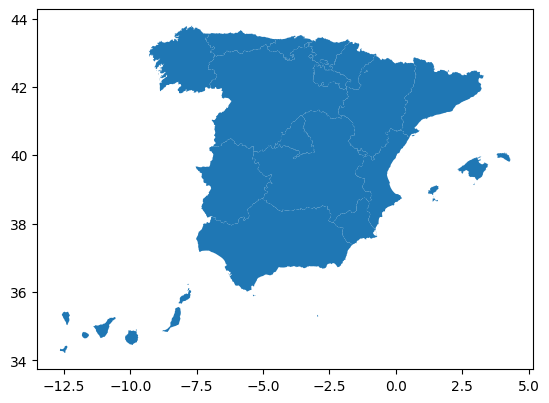

In [22]:
gdf.plot()

Las geometrías puede ser de tipo Punto, Líneas o polígonos espaciales (simple features). Cada figura espacial (**feature**, !!!ojo que en machine learning feature sería cada variable o característica,columna, correspondiente a cada unidad, a cada fila, pero aquí feature es un objeto espacial, una unidad de observación o una fila!!!! ).    
 ... como digo cada objeto, unidad o figura espacial puede estar compuesta por ejemplo por un único polígono, como el caso de Asturias

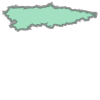

In [23]:
gdf["geometry"][2]


o como conjunto de polígonos o Multipolígonos, como el caso de las Islas Canarias

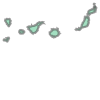

In [24]:
gdf["geometry"][4]

_____________________________________________

Esta cartografía viene vacía, sin metadatos, podemos ir añadiendo algunas variables. Podemos por ejemplo incluir algunas variables que podemos obtener de la propia geometría, como el **área total** de cada CCAA,o su **centroide**

In [25]:
gdf["area"] = gdf.area
# Ojo con el warning!!!

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24984\3570245118.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


In [26]:
gdf.head()

,SP_ID,id,cod_CCAA,geometry,area
0,CA01,CA01,CA01,"POLYGON ((-6.93051 38.21019, -6.92576 38.20631...",8.922890
1,CA02,CA02,CA02,"POLYGON ((-0.72615 42.92112, -0.73275 42.91431...",5.148104
2,CA03,CA03,CA03,"POLYGON ((-6.83889 43.56722, -6.83941 43.56796...",1.176132
3,CA04,CA04,CA04,"MULTIPOLYGON (((1.41368 38.73321, 1.41619 38.7...",0.523204
4,CA05,CA05,CA05,"MULTIPOLYGON (((-12.47898 34.39634, -12.47412 ...",0.728376


Para el calculo del área es necesario tener bien definido el sistema de referencia ya que el área utiliza la unidad de medida que esté utilizando la cartografía del geo_dataframe ( el mismo sistema de referencia que se está utilizando para la localización de los diferentes elementos del mapa que estamos representando, esto es, los polígonos de las Comunidades Autónomas).    
     
Es posible que os aparezca un warning referente a estas proyecciones utilizadas en las geometrías. En este caso yo he bajado los datos cartográficos del INE **(EPSG:4258)**
 

In [27]:
# Para conocer el sistema de coordenadas de referencia
gdf.crs


<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Para consultar características de cada sistema de referencia    
[http://epsg.io]  
[http://spatialreference.org]    

Por ejemplo: CRS("epsg:3857") es el sistema de coordenadas de referencia PSeudomercator - Spherical Mercator  que usa Open Street Maps (y Google Maps, Bing, ArcGIS, ESRI y otroas aplicaciones web )  
http://spatialreference.org/ref/epsg/3857/

Esta sistema de Coordenadasd de referencia de Google/Bing/OpenStreetMap/etc tambien se conoce como EPSG:900913  y está basado en el sistema de coordenadas mundial WGS 84.
EPSG:4326 WGS 84


Como digo las áreas y las distancias se calculan en términos de las unidades originales. Como **el crs EPSG:4258 utiliza coordenadas geográficas**, el área que hemos calculado está expresada en términon de grados decimales cuadrados.     

Trabajar en grados puede ser dificil, a no ser que seas marinero (una milla náutica es un grado de latitud)

Para pasar de grados decimales a metros podemos recordar de donde vien la definición de metro.    
un metro es una diezmillonésima parte del cuadrante del meridiano terrestre, entonces 360º= 4*1000000, esto es, un grado 1º de meridiano o de latitud =40000000/360 metros = 111.111 km     

esto es un grado de latitud equivale aproximadamente a 111.111 km y un grado de longitud a 111.111 km * cos(latitud)

Para poder calcular directamente el área en términos de metros (o de Km2) podemos utilizar un CRS que utilice metros (alguno que utilice un sistema de coordinadas UTM)

In [28]:
# Puedo fijar la cartografía en otro sistema de referencia:
# gdf=gdf.to_crs(epsg=3857) # este epsg=3857 Pseudo-Mercator -- Spherical Mercator es el que utilizan Google Maps, OpenStreetMap, Bing, ArcGIS, ESRI


gdf=gdf.to_crs(epsg=25830) # este es el ETRSE89 pero UTM zona 30 (en metros)
gdf.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Fíjate que ahora la longitud y la magnitud se mide en el ejes cartesianos en metros

In [29]:
gdf["area"] = gdf.area/1000000   #(como el original viene en metros, para pasar a km2 tenemos que dividir por 1000000)

In [30]:
gdf

,SP_ID,id,cod_CCAA,geometry,area
0,CA01,CA01,CA01,"POLYGON ((155834.996 4236444.997, 156233.001 4...",87612.124015
1,CA02,CA02,CA02,"POLYGON ((685577.968 4754564.06, 685060.004 47...",47730.759122
2,CA03,CA03,CA03,"POLYGON ((189980.546 4830969.913, 189941.993 4...",10611.251483
3,CA04,CA04,CA04,"MULTIPOLYGON (((883702.517 4296428.309, 883898...",5019.170365
4,CA05,CA05,CA05,"MULTIPOLYGON (((-372718.985 3847107.993, -3722...",7445.506807
5,CA06,CA06,CA06,"MULTIPOLYGON (((350488.003 4782740.939, 350818...",5318.498135
6,CA07,CA07,CA07,"MULTIPOLYGON (((505870.004 4717853.126, 505884...",94222.733096
7,CA08,CA08,CA08,"MULTIPOLYGON (((579686.017 4555700.94, 580021....",79412.640675
8,CA09,CA09,CA09,"MULTIPOLYGON (((799941.02 4733209.066, 800311....",32204.422256
9,CA10,CA10,CA10,"MULTIPOLYGON (((797889.995 4491948.128, 797771...",23265.247725


______________________

Podemos ahora  añadir **el centroide de cada CCAA** y lo guardo como otra columna adicional en mi datagrame

In [31]:
gdf['centroide'] = gdf.centroid

In [32]:
gdf.head()

,SP_ID,id,cod_CCAA,geometry,area,centroide
0,CA01,CA01,CA01,"POLYGON ((155834.996 4236444.997, 156233.001 4...",87612.124015,POINT (360453.279 4148155.273)
1,CA02,CA02,CA02,"POLYGON ((685577.968 4754564.06, 685060.004 47...",47730.759122,POINT (694983.348 4598631.376)
2,CA03,CA03,CA03,"POLYGON ((189980.546 4830969.913, 189941.993 4...",10611.251483,POINT (257226.66 4797998.877)
3,CA04,CA04,CA04,"MULTIPOLYGON (((883702.517 4296428.309, 883898...",5019.170365,POINT (1007718.874 4397552.071)
4,CA05,CA05,CA05,"MULTIPOLYGON (((-372718.985 3847107.993, -3722...",7445.506807,POINT (-144056.444 3901895.209)


______________________________

Y podemos calcular **la distancia a un punto, por ejemplo al centroide de Madrid CA13**

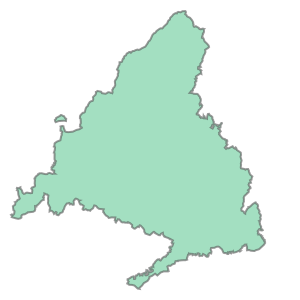

In [33]:
gdf["geometry"][12]

In [34]:
Madrid_point = gdf['centroide'].iloc[12]
gdf['distancia'] = gdf['centroide'].distance(Madrid_point)/1000 # en km


In [35]:
gdf

,SP_ID,id,cod_CCAA,geometry,area,centroide,distancia
0,CA01,CA01,CA01,"POLYGON ((155834.996 4236444.997, 156233.001 4...",87612.124015,POINT (360453.279 4148155.273),344.120470
1,CA02,CA02,CA02,"POLYGON ((685577.968 4754564.06, 685060.004 47...",47730.759122,POINT (694983.348 4598631.376),280.518207
2,CA03,CA03,CA03,"POLYGON ((189980.546 4830969.913, 189941.993 4...",10611.251483,POINT (257226.66 4797998.877),363.769222
3,CA04,CA04,CA04,"MULTIPOLYGON (((883702.517 4296428.309, 883898...",5019.170365,POINT (1007718.874 4397552.071),574.764938
4,CA05,CA05,CA05,"MULTIPOLYGON (((-372718.985 3847107.993, -3722...",7445.506807,POINT (-144056.444 3901895.209),823.516450
5,CA06,CA06,CA06,"MULTIPOLYGON (((350488.003 4782740.939, 350818...",5318.498135,POINT (416370.402 4783493.553),301.264183
6,CA07,CA07,CA07,"MULTIPOLYGON (((505870.004 4717853.126, 505884...",94222.733096,POINT (351646.143 4624021.461),165.981758
7,CA08,CA08,CA08,"MULTIPOLYGON (((579686.017 4555700.94, 580021....",79412.640675,POINT (499548.755 4381098.48),118.443594
8,CA09,CA09,CA09,"MULTIPOLYGON (((799941.02 4733209.066, 800311....",32204.422256,POINT (876105.656 4637454.158),463.219240
9,CA10,CA10,CA10,"MULTIPOLYGON (((797889.995 4491948.128, 797771...",23265.247725,POINT (710398.414 4363699.618),296.178332


### Podemos hacer gráficos de cloropletas estáticos (aquí los colores están en función del área)

<Axes: >

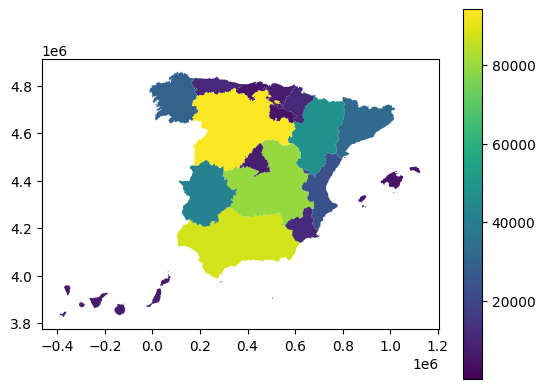

In [36]:
gdf.plot("area", legend=True)

Es muy importante la paleta de colores, que las tonalidades muestren claramente una relación entre intensidad y valores de las variables [Paletas de Colores en matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


<Axes: >

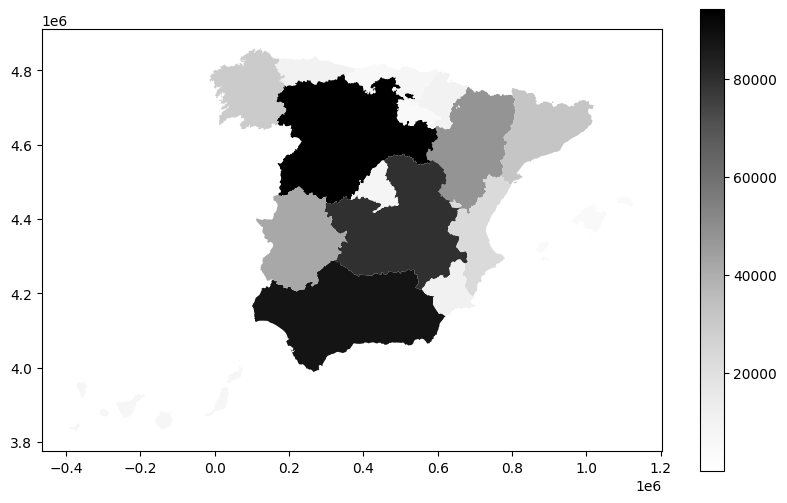

In [37]:
gdf.plot("area", legend=True, cmap='Greys', figsize=(10,6))

<Axes: >

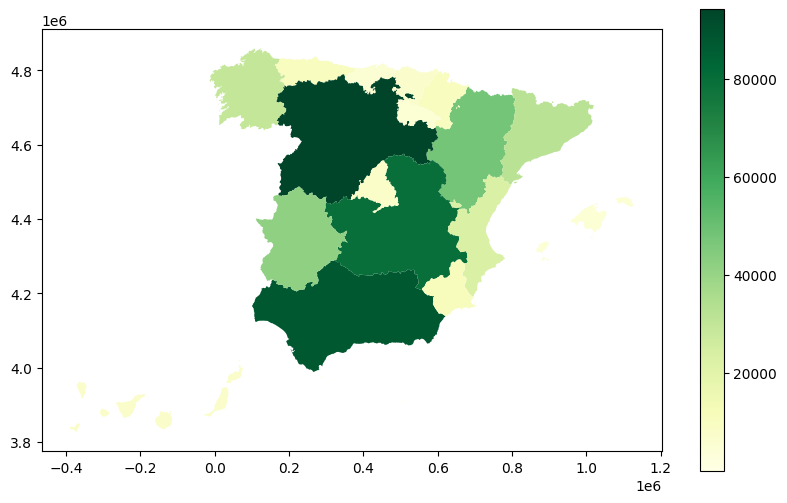

In [38]:
gdf.plot("area", legend=True, cmap='YlGn', figsize=(10,6))

In [40]:
! pip install folium matplotlib mapclassify

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 110.5/110.5 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
   ---------------------------------------- 59.1/59.1 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/88.4 kB ? eta -:--:--
   ---------------------------------------- 88.4/88.4 kB 4.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# o dinámicos (requiere la librería `folium`, comprobar todos los métodos instalados en la versión de geopandas con print(dir(gpd)) debe estar 'explore'.
# Si no está este método 'explore' intalar la última versión conda install --channel conda-forge geopandas==0.12.2)
gdf.explore("area", legend=False)

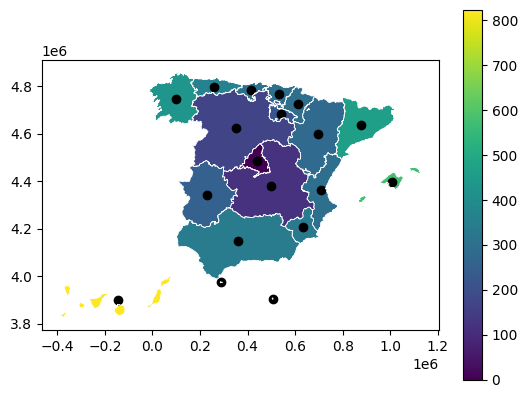

In [42]:
# podemos dibujar las fronteras y los centroides como si fueran capas

map=gdf.plot("distancia", legend=True)
map=gdf.boundary.plot(ax=map, color="white", linewidth=.5)
map=gdf["centroide"].plot(ax=map, color="black")

Podemos cambiar la paleta de colores   [Paletas de Colores en matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


<Axes: >

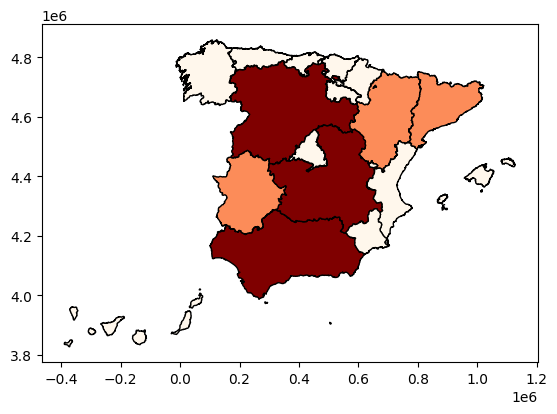

In [43]:
gdf.plot(column='area', scheme='equal_interval', k=3, cmap='OrRd', edgecolor='k') 

O podemos añadir a un gráfico estático también fondos de OpenstreetMap y de otras librerías 

In [45]:
! pip install contextily

  Using cached contextily-1.6.2-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
    --------------------------------------- 0.3/25.4 MB 6.8 MB/s eta 0:00:04
    --------------------------------------- 0.6/25.4 MB 5.9 MB/s eta 0:00:05
   - -------------------------------------- 0.8/25.4 MB 5.6 MB/s eta 0:00:05
   - -------------------------------------- 1.1/25.4 MB 5.1 MB/s eta 0:00:05
   -- ------------------------------------- 1.5/25.4 MB 5.5 MB/s eta 0:00:05
   -- ------------------------------------- 1.8/25.4 MB 5.6 MB/s eta 0:00:05
   --- ------------------------------------ 2.3/25.4 MB 6.1 MB/s eta 0:00:04
   ---- ----------------------------------- 2.6/25.4 MB 6.1 MB/s eta 0:00:04
   ---- ----------------------------------- 2.9/25.4 MB 6.1 MB/s eta 0:00:04
   ---- ----------------------------------- 3.2/25.4 MB 6.1 MB/s eta 0:00:04
   ----- ---------------------------------- 3.5/25.4 MB 6.2 MB/s eta 0:00:04
   ------ ------


[notice] A new release of pip is available: 24.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


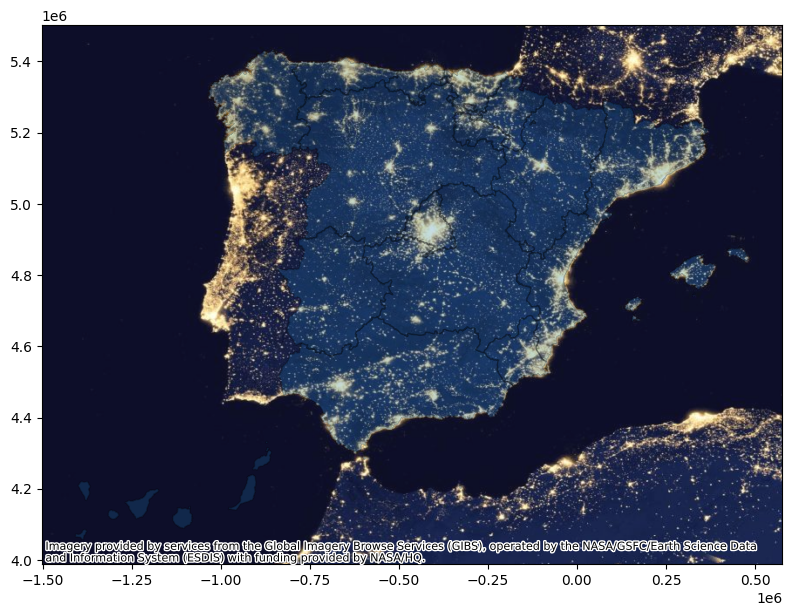

In [46]:
# pip install contextily desde el terminal si fuese necesario
import contextily as cx
import xyzservices.providers as xyz
# pasamos nuestro mapa al sistema Web Mercator (EPSG 3857)
gdf_wm = gdf.to_crs(epsg=3857)
map_c=gdf_wm.plot( edgecolor='k', figsize=(10,7), alpha=0.25)
# Ahora le añadimos una cartografía base
cx.add_basemap(map_c, source=xyz.NASAGIBS.ViirsEarthAtNight2012, alpha=0.95)
               
# Buscar diferentes proveedores de cartografías:  https://contextily.readthedocs.io/en/latest/providers_deepdive.html

#cx.add_basemap(map_c, source=xyz.CartoDB.Positron)
#cx.add_basemap(map_c, source=xyz.OpenStreetMap.HOT)
#cx.add_basemap(map_c, source=xyz.OpenTopoMap)


## Importar Metadatos a una Cartografías

Ahora vamos a añadirle datos a cada CCAA


In [48]:
# aquí estoy utilizando la librería Pandas as pd
salarios=pd.read_csv("CartografiasDatos_Python/datos/SALARIOS.csv",encoding='latin1',sep=";")
salarios.head()

,COD_CCAA,Nombre CCAA,SALARIO
0,CA01,Andalucía,12.40
1,CA02,Aragón,13.43
2,CA03,"Asturias, Principado de",14.24
3,CA04,"Balears, Illes",11.54
4,CA05,Canarias,11.88


In [ ]:
# ahora fusionamos los datos de salarios a la cartografía
gdf=pd.merge(gdf, salarios,how='left', left_on='cod_CCAA', right_on='COD_CCAA')
gdf



In [ ]:
ax=gdf.plot(column='SALARIO', 
         scheme='EqualInterval',
         k=8, cmap='YlOrRd',
         edgecolor='w',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Salarios'} 
)
ax.set_axis_off()   

In [ ]:

ax=gdf.plot(column='SALARIO', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         edgecolor='w',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Salarios'} 
)
ax.set_axis_off()       


Para terminar voy a **grabar** la cartografía con todos los campos para no tener que volver a cargarla.   

**Ojo que por ejemplo el formato ESRI 'shp' sólo permite una cartografía**

In [ ]:
gdf.info()

Tengo que quitar una de las dos columans de cartografías

In [ ]:
gdf["xlong"]=gdf['centroide'].x
gdf["ylat"]=gdf['centroide'].y
gdf=gdf.drop('centroide', axis=1)
gdf.head()

In [ ]:
gdf.info()

In [ ]:
gdf.to_file('cartografias/CCAA_map.shp', encoding='latin1')

# Mapa de España

Ahora voy a hacer un mapa de España

In [ ]:

gdfm =gpd.read_file("cartografias/Munic04_ESP.shp")
gdfm.info()


In [ ]:
map=gdfm.plot(column='PrecioIn16', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Precio de la Vivienda'} 
)
map.set_axis_off()       


Puedo intentar ponerle encima cartografía de comunidades autónomas o provincias. Primero voy a crear la cartografía de las provincias agregando municipios (features) utilizando la función `dissolve()` de `GeoPandas`

In [ ]:
gprov=gdfm.dissolve(by="COD_PROV")
gprov.plot() 
   

In [ ]:
map=gdfm.plot(column='PrecioIn16', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Precio de la Vivienda'} 
)
map=gprov.boundary.plot(ax=map,color="dimgray", linewidth=.75)
map.set_axis_off()  

## Extensiones

Hay un gran número de paquetes y de utilidades para trabajar con datos espaciales. Por ejemplo:
- para poder representar puntos en un mapa es necesario tner la geolocalizaciópn de los puntos utilizando por ejemplo las direcciones postales. La función de `GeoPandas` **`tools.geocode()`** sirve para geolocalizar direcciones. También la librería **`geocoder`** hace lo mismo     
    
- La librería **`contextily`** sirve para añadir mapas contextuales OpenStreetMap a los gráficos de `GeoPandas`

- La librería **`osmnx`** sirve para interactuar con la api de Openstreetmap

- La librería **`Folium`** sirve para crear mapas web con Leaflet

- La librería **`Shapely`** para gestionar cartografías

